## En este Notebook se desarrolla un modelo de ajuste y predicción para el precio de diamantes segun sus características como: tipo de corte, color, claridad, peso, etc. El algoritmo que dio mejores resultados, después de probar con varios fue Random Forest Regressor.


In [1038]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df: datos para entrenar y testear

test: datos para predecir el precio y subir a Kaggle.

In [1039]:
df=pd.read_csv('diamonds_train.csv')
test=pd.read_csv('diamonds_test.csv')

In [1040]:
df.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
5,1.52,Ideal,F,SI2,61.2,57.0,9057,7.45,7.39,4.54
6,1.01,Fair,H,VS2,65.2,56.0,3733,6.23,6.19,4.05
7,1.52,Ideal,J,VS1,62.3,58.0,8608,7.32,7.35,4.57
8,0.31,Ideal,H,VS1,61.8,54.2,557,4.33,4.37,2.69
9,1.14,Ideal,G,SI1,61.7,56.0,6741,6.71,6.75,4.15


In [1041]:
test.head()


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [1042]:
df.shape

(40455, 10)

In [1043]:
test.shape

(13485, 10)

In [1044]:
df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


 Features:
*  id: only for test & sample submission files, id for prediction sample identification
*  price: price in USD
*  carat: weight of the diamond
*  cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*  color: diamond colour, from J (worst) to D (best)
*  clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*  x: length in mm
*  y: width in mm
*  z: depth in mm
*  depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*  table: width of top of diamond relative to widest point (43--95)

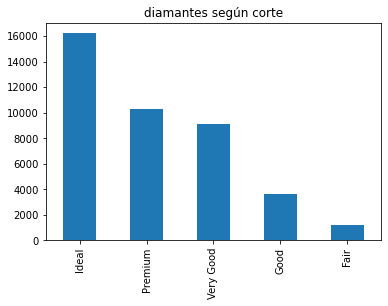

In [1045]:
df['cut'].value_counts().plot(kind='bar',title='diamantes según corte')

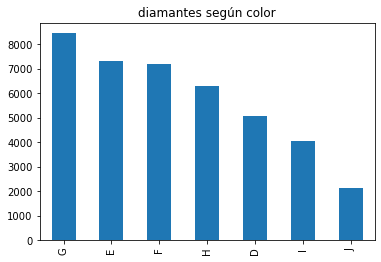

In [1046]:
df['color'].value_counts().plot(kind='bar',title='diamantes según color')

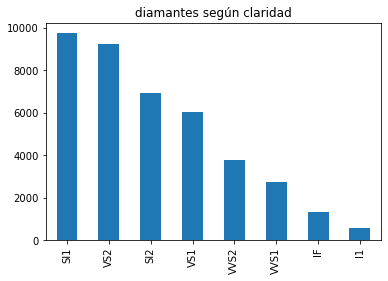

In [1047]:
df['clarity'].value_counts().plot(kind='bar',title='diamantes según claridad')

In [1048]:
#condicion=df['cut']=='Good'
df[condicion]

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
15,1.50,Good,G,SI2,57.5,63.0,6006,7.53,7.49,4.32
56,1.00,Good,J,SI1,63.9,60.0,3679,6.26,6.19,3.98
60,1.01,Good,G,SI1,63.7,60.0,5113,6.32,6.28,4.01
72,0.78,Good,H,VS2,63.7,60.0,2440,5.77,5.73,3.66
...,...,...,...,...,...,...,...,...,...,...
40412,0.31,Good,G,SI1,63.6,57.0,462,4.29,4.33,2.74
40417,0.91,Good,G,VS2,63.6,58.0,4257,6.10,6.14,3.89
40419,0.30,Good,G,VVS1,64.0,57.0,678,4.23,4.27,2.72
40447,0.91,Good,D,SI2,64.1,62.0,3349,6.06,6.01,3.87


In [1049]:
#df=df.drop(df[condicion].index)

In [1050]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

vemos que no hay valores nulos en ninguna columna

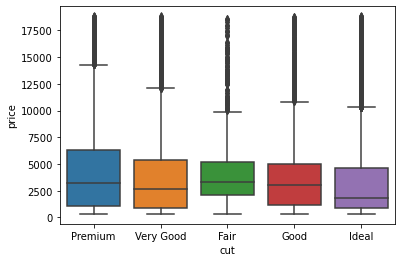

In [1051]:
sns.boxplot(x='cut',y='price',data=df)

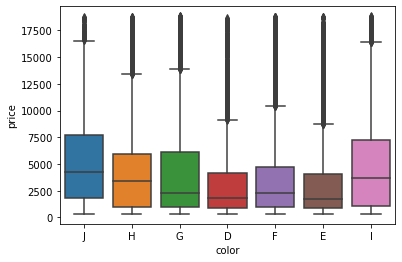

In [1052]:

sns.boxplot(x='color',y='price',data=df)

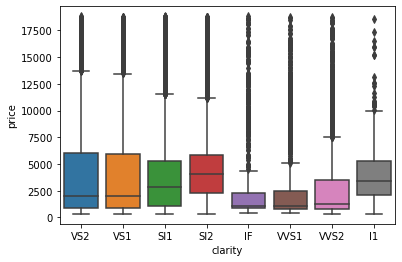

In [1053]:
sns.boxplot(x='clarity',y='price',data=df)

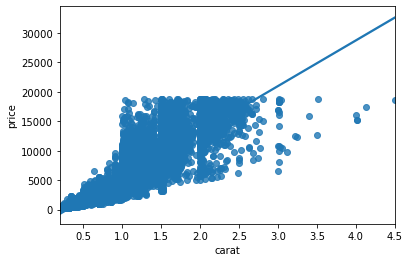

In [1054]:
sns.regplot(x='carat',y='price',data=df)

In [1055]:
df[['carat','price']].corr()

,carat,price
carat,1.000000,0.921935
price,0.921935,1.000000


Se aprecia una correlación muy alta entre el peso y el precio de los diamantes. Así que definitivamente ésta es la variable predictora más significativa. Sin embargo,en el peso 3.0 hay una variación importante entre los precios, de alrededor de 6000 el más barato hasta alrededor de 17000 el más caro. A partir del peso 3.0 los precios tampoco son todo lo alto que uno supondría. Esto nos indica la importancia de las otras variables categóricas en el valor y/o quizá las dimensiones del diamante. Aunque quizá algunos de estos valores sean simplemente outliers. Veamos un gráfico heatmap para ver correlación entre todas  las variables numéricas:

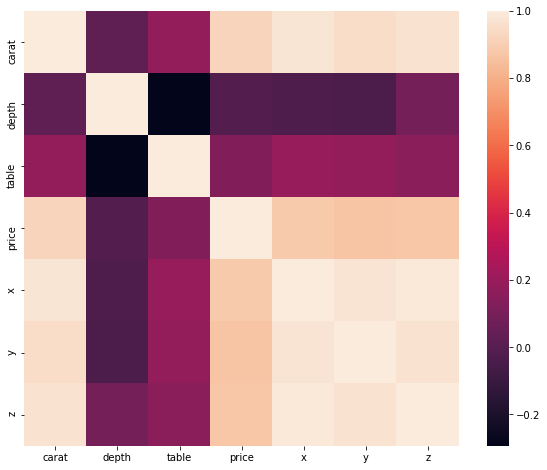

In [1056]:
matcorr=df.corr()
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(matcorr,square=True);

In [1057]:
df[['carat','x']].corr()

,carat,x
carat,1.000000,0.975688
x,0.975688,1.000000


In [1058]:
df[['carat','y']].corr()

,carat,y
carat,1.000000,0.951667
y,0.951667,1.000000


In [1059]:
df[['carat','z']].corr()

,carat,z
carat,1.00000,0.96757
z,0.96757,1.00000


In [1060]:
df[['depth','table']].corr()

,depth,table
depth,1.000000,-0.293114
table,-0.293114,1.000000


 Hay una fuerte correlación entre carat y cada una de las variables x, y, z, es decir con las dimensiones del
 diamante. Esto indicaría que habría que eliminarlas como variables predictoras y quedarnos sólo con carat, que
 en el fondo las resume a todas. 
 Por otro lado, hay una correlación muy pobre entre las variables depth y table con el precio, por lo que las eliminaremos también en el modelo.


## Preprocesamiento

In [1061]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#### Características a considerar en el modelo

In [1062]:
NUM_FEATS = ['carat','depth','table']
CAT_FEATS = [ 'cut','color','clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'

let's define a preprocessing transformer for numerical columns...

In [1063]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                ('scaler', StandardScaler())])

let's define a preprocessing transformer for categorical columns...

In [1064]:
categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

let's join these transformers using a ColumnTransformer:

In [1065]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),('cat', categorical_transformer, CAT_FEATS)])

In [1066]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cut', 'color', 'clarity'])])

In [1067]:
pd.DataFrame(data=preprocessor.fit_transform(df)).head()

,0
0,"(0, 0)\t0.86700559845042\n (0, 1)\t0.452018..."
1,"(0, 0)\t-1.004557489479606\n (0, 1)\t0.8710..."
2,"(0, 0)\t-0.18443433858892058\n (0, 1)\t2.61..."
3,"(0, 0)\t-0.815298300812525\n (0, 1)\t1.4298..."
4,"(0, 0)\t0.4674584223754707\n (0, 1)\t-0.875..."


## Entrenamiento de Modelo

Division df en conjuntos training y test:

In [1068]:
from sklearn.model_selection import train_test_split

In [1069]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=3)

In [1070]:
print(df_train.shape)
print(df_test.shape)


(32364, 10)
(8091, 10)


### Modelando con RandomForest, que es el algoritmo que logró los mejores resultados (También probé: Linear Regression, GradientBoostMachine, SVM, etc).

In [1071]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint



rf=RandomForestRegressor(n_estimators=400,bootstrap=True,random_state=0,oob_score=True,n_jobs=1,min_samples_split=8,
ccp_alpha=0.001)

pprint(rf.get_params())


ling=LinearRegression()
gbg=GradientBoostingRegressor()


model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor',rf)])

{'bootstrap': True,
 'ccp_alpha': 0.001,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


Importancia variables

In [1072]:
model.fit(df_train[FEATS], df_train[TARGET]);

#### Check model

In [1073]:
from sklearn.metrics import mean_squared_error

In [1074]:
y_train = model.predict(df_train[FEATS]) # Predicción sobre conjunto de entrenamiento
y_test = model.predict(df_test[FEATS])   # Predicción sobre conjunto de testeo

Errores en entrenamiento y testeo

In [1075]:
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=df_train[TARGET], squared=False)}")
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=df_test[TARGET], squared=False)}")

train error: 338.4442089003695
test error: 547.7367589718452


#### Cross Validation

In [1076]:
from sklearn.model_selection import cross_val_score

In [1077]:
scores = cross_val_score(model, 
                         df[FEATS], 
                         df[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [1078]:
import numpy as np
np.mean(-scores)

551.1804463787901

##### Submission

In [1079]:
model.fit(df[FEATS], df[TARGET]);

In [1080]:
y_pred=model.predict(test[FEATS])

In [1081]:
submission_df = pd.DataFrame({'id': test['id'], 'price': y_pred})

In [1082]:
submission_df.head()


,id,price
0,0,3027.507015
1,1,5287.539388
2,2,10580.538060
3,3,4150.861058
4,4,1650.327163


In [1083]:
submission_df.shape

(13485, 2)

In [1084]:
submission_df.to_csv('diamonds_rf.csv', index=False)